In [1]:
import numpy as np
import pandas as pd
import spacy
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt 
from itertools import chain
from wordcloud import WordCloud, STOPWORDS 
# !pip install xlrd==1.2.0
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
# !pip install xlrd==1.2.0

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [3]:
# data = pd.read_excel(r'C:/Users/Checkout/Desktop/SJSU/sem1/257-ML/Project/global_warming_tweets.xls')
data = pd.read_csv(r'C:/Users/Checkout/Desktop/SJSU/sem1/257-ML/Project/global_warming_tweets_main.csv', engine='python') #encoding = "cp1252"

data.head()

,tweet,existence,existence.confidence
0,Global warming report urges governments to act...,Yes,1.0000
1,Fighting poverty and global warming in Africa ...,Yes,1.0000
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087


In [4]:
print(data['existence'].value_counts())


Y      2554
N      1053
Yes     557
No       61
Name: existence, dtype: int64


In [5]:
data['word_count'] = data['tweet'].apply(lambda x: len(x.split(" ")))
data = data.drop_duplicates()
data = data.dropna()
data.loc[data['existence'] == 'Y','existence'] = "Yes"
data.loc[data['existence'] == 'N','existence'] = "No"
print(data.shape)
data.dropna()
data.loc[data['existence'] == np.nan,'existence'] = "No"
print(data['existence'].value_counts())
print(data.shape)
data.head()

(4134, 4)
Yes    3029
No     1105
Name: existence, dtype: int64
(4134, 4)


,tweet,existence,existence.confidence,word_count
0,Global warming report urges governments to act...,Yes,1.0000,18
1,Fighting poverty and global warming in Africa ...,Yes,1.0000,8
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786,12
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000,12
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087,11


In [6]:
tweets = data["tweet"]
# tweets = tweets.drop_duplicates()
tweets

0       Global warming report urges governments to act...
1       Fighting poverty and global warming in Africa ...
2       Carbon offsets: How a Vatican forest failed to...
3       Carbon offsets: How a Vatican forest failed to...
4       URUGUAY: Tools Needed for Those Most Vulnerabl...
                              ...                        
6084    It's 83•_Á and climbing in NYC. August weather...
6085    @bloodless_coup "The phrase 'global warming' s...
6087    Global warming you tube parody you will enjoy ...
6088    One-Eyed Golfer: Don't dare tell me about glob...
6089    man made global warming a hair brained theory ...
Name: tweet, Length: 4134, dtype: object

For Preprocessing we have used

In [7]:
### Source: https://spacy.io/usage/linguistic-features

def spacyPipeline(tweets):
    ps = PorterStemmer()
    nlp = spacy.load('en_core_web_sm')
    
    preprocessed_tweets = []
    for t in tweets:
        doc = nlp(t)
        filtered_tweet = []
        
        for token in doc:
            if (not token.is_stop) and token.is_alpha:
                filtered_tweet.append(ps.stem(str(token)))
        
        preprocessed_tweets.append(filtered_tweet)
    
    return preprocessed_tweets

In [8]:
def preprocess(tweets):
    # Convert all to lowercase
    tweets = [t.lower() for t in tweets]
    
    # Process tweets through spaCy pipeline
    tweets = spacyPipeline(tweets)
    
    # Filter out words
    tweets = [list(filter(lambda w: w != 'link', t)) for t in tweets]
    
    # Remove words less than length 2
    tweets = [list(filter(lambda w: len(w) > 2, t)) for t in tweets]
    
    print(tweets)
    return tweets

In [9]:
def generateWordCloud(tweets):
    allwords = " ".join(set(chain.from_iterable(tweets)))
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = set(STOPWORDS), 
                    min_font_size = 10).generate(allwords)

    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.figure(figsize = (7, 7), facecolor = 'white', edgecolor='blue') 
    plt.imshow(wordcloud) 

    plt.show()

In [10]:
# python -m spacy download en_core_web_sm
preprocessed_tweets = preprocess(tweets)

[['global', 'warm', 'report', 'urg', 'govern', 'belgium', 'world', 'face', 'increas', 'hunger'], ['fight', 'poverti', 'global', 'warm', 'africa'], ['carbon', 'offset', 'vatican', 'forest', 'fail', 'reduc', 'global', 'warm'], ['carbon', 'offset', 'vatican', 'forest', 'fail', 'reduc', 'global', 'warm'], ['uruguay', 'tool', 'need', 'vulner', 'climat', 'chang'], ['ocean', 'salti', 'show', 'global', 'warm', 'intensifi', 'water', 'cycl'], ['global', 'warm', 'evid', 'messag', 'global', 'warm', 'denier', 'doubter', 'look'], ['migratori', 'bird', 'new', 'climat', 'chang', 'strategi', 'stay', 'home'], ['southern', 'africa', 'compet', 'limpopo', 'water', 'climat', 'chang', 'bring', 'higher', 'temperatur', 'south'], ['global', 'warm', 'impact', 'wheat', 'rice', 'product', 'apr', 'scarciti', 'water'], ['solv', 'global', 'warm', 'thing'], ['preliminari', 'analysi', 'suggest', 'natur', 'contribut', 'far', 'global', 'warm', 'previous'], ['ecoton', 'climat', 'chang', 'popul', 'perspect'], ['climat', 'c

## VISUALIZATIONS
https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

https://github.com/yrtnsari/Sentiment-Analysis-NLP-with-Python/blob/main/wordcloud.ipynb


In [11]:
# generateWordCloud([t.split(' ') for t in tweets])
# generateWordCloud(preprocessed_tweets)

<AxesSubplot:title={'center':'Tweet Sentiment Distribution '}, ylabel='Frequency'>

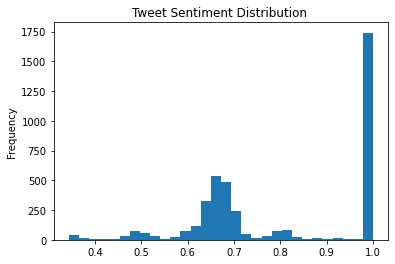

In [12]:
data['existence.confidence'].plot(
    kind='hist',
    bins=30,
    title='Tweet Sentiment Distribution ')

<AxesSubplot:title={'center':'Tweet Word Count Distribution'}, ylabel='Frequency'>

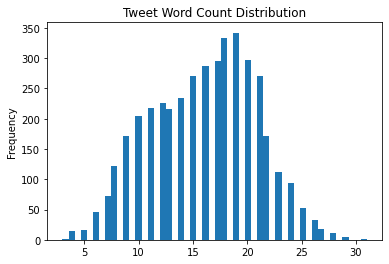

In [13]:
data['word_count'].plot(
    kind='hist',
    # xTitle = "Word Count",
    bins=50,
    title='Tweet Word Count Distribution')

           existence.confidence  word_count
existence                                  
No                     840.8694       18845
Yes                   2474.1951       47302


<AxesSubplot:title={'center':'Existence Distribution'}, xlabel='existence'>

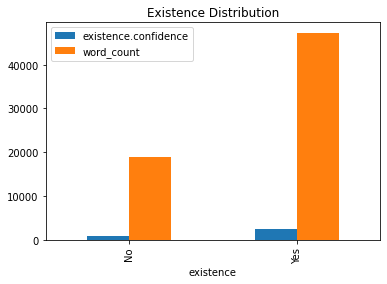

In [14]:
print(data.groupby(by=["existence"]).sum())
data.groupby(by=["existence"]).sum().plot(kind = 'bar',title = "Existence Distribution")

global 2437
warming 2360
climate 2355
change 2155
link 489
retwt 218
snow 217
tcot 187
news 177
science 162
oohja 158
green 150
will 149
earth 131
world 130
report 129
gore 112
time 103
scientists 102
energy 102


,tweet,word_count
0,global,2437
1,warming,2360
2,climate,2355
3,change,2155
4,link,489


<AxesSubplot:title={'center':'Top 20 words in review before preprocessing'}, xlabel='tweet'>

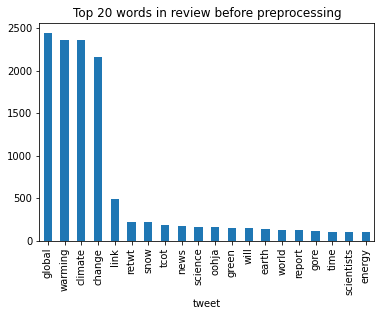

In [15]:
# The distribution of top unigrams before removing stop words
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items() if len(word) > 3 and word not in set(STOPWORDS)]
    # words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(data['tweet'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['tweet' , 'word_count'])
display(df1.head())

df1.groupby('tweet').sum()['word_count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review before preprocessing')



<AxesSubplot:title={'center':'Top 20 words in review after preprocessing'}>

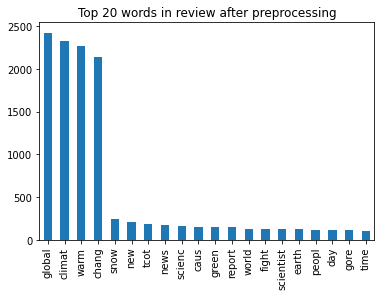

In [16]:
allwords = list(chain.from_iterable(preprocessed_tweets))
df2 = pd.DataFrame(allwords,columns = ["words"])
df2['words'].value_counts()[:20].plot(kind='bar', title='Top 20 words in review after preprocessing')
# allwords
# preprocessed_tweets

In [17]:
data.head()

,tweet,existence,existence.confidence,word_count
0,Global warming report urges governments to act...,Yes,1.0000,18
1,Fighting poverty and global warming in Africa ...,Yes,1.0000,8
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786,12
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000,12
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087,11


In [18]:
prepr_tweets = [" ".join(each) for each in preprocessed_tweets]
data['cleaned_tweet'] = prepr_tweets
data.head()

,tweet,existence,existence.confidence,word_count,cleaned_tweet
0,Global warming report urges governments to act...,Yes,1.0000,18,global warm report urg govern belgium world fa...
1,Fighting poverty and global warming in Africa ...,Yes,1.0000,8,fight poverti global warm africa
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786,12,carbon offset vatican forest fail reduc global...
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000,12,carbon offset vatican forest fail reduc global...
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087,11,uruguay tool need vulner climat chang


In [19]:
len(prepr_tweets), data.shape

(4134, (4134, 5))

In [20]:
# data

In [22]:
# TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import collections, numpy

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['cleaned_tweet'].astype('U'))

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data['cleaned_tweet'].astype('U'))
print(text_tf)

  (0, 2074)	0.44004286882634286
  (0, 2160)	0.2918565305128533
  (0, 1508)	0.35369922238742685
  (0, 4639)	0.24628600623373403
  (0, 365)	0.4559845977665824
  (0, 1823)	0.3110781751459329
  (0, 4411)	0.39510565884939025
  (0, 3480)	0.2414643231345268
  (0, 4517)	0.09201851246366663
  (0, 1784)	0.08859802660286194
  (1, 77)	0.5966257762777153
  (1, 3211)	0.6252558762057752
  (1, 1570)	0.44773308960145214
  (1, 4517)	0.1652580605869089
  (1, 1784)	0.1591151351636717
  (2, 3423)	0.3791887251581771
  (2, 1514)	0.41072565055902793
  (2, 1636)	0.3791887251581771
  (2, 4447)	0.4729651640764245
  (2, 2937)	0.4347987532695552
  (2, 606)	0.32803772361866196
  (2, 4517)	0.110151676825354
  (2, 1784)	0.10605715015851813
  (3, 3423)	0.3791887251581771
  (3, 1514)	0.41072565055902793
  :	:
  (4131, 1383)	0.443363730186245
  (4131, 2929)	0.3996155020472399
  (4131, 4517)	0.1048063493471157
  (4131, 1784)	0.1009105176664426
  (4132, 4187)	0.3539028809325241
  (4132, 1805)	0.7078057618650482
  (4132, 1

In [23]:
data.isna().sum()


tweet                   0
existence               0
existence.confidence    0
word_count              0
cleaned_tweet           0
dtype: int64

In [24]:
# compute similarity using cosine similarity
cos_sim=cosine_similarity(text_tf, text_tf)
print(cos_sim)

[[1.         0.02930409 0.01953245 ... 0.0185846  0.01206939 0.01446592]
 [0.02930409 1.         0.03507875 ... 0.03337648 0.02167569 0.02597966]
 [0.01953245 0.03507875 1.         ... 0.02224688 0.01444779 0.01731657]
 ...
 [0.0185846  0.03337648 0.02224688 ... 1.         0.01374668 0.01647625]
 [0.01206939 0.02167569 0.01444779 ... 0.01374668 1.         0.01070017]
 [0.01446592 0.02597966 0.01731657 ... 0.01647625 0.01070017 1.        ]]


In [25]:
# splitting data 

X_train, X_test, y_train, y_test = train_test_split(cos_sim, data['existence'], test_size=0.2, random_state=33)
print(" Test Data Shape:", X_test.shape)
print(" Train Data Shape:",X_train.shape)

pos = (y_test == 'Yes').sum()
neg = (y_test == 'No').sum()
postrain = (y_train == 'Yes').sum()
negtrain = (y_train == 'No').sum()
total = pos + neg
print(" Test Data Positive Sentiments :", pos)
print(" Test Data Negative Sentiments :",neg)
print(" Train Data Positive Sentiments :", postrain)
print(" Train Data Positive Sentiments :",negtrain)
data['existence'].value_counts()


 Test Data Shape: (827, 4134)
 Train Data Shape: (3307, 4134)
 Test Data Positive Sentiments : 599
 Test Data Negative Sentiments : 228
 Train Data Positive Sentiments : 2430
 Train Data Positive Sentiments : 877


Yes    3029
No     1105
Name: existence, dtype: int64

In [26]:
# perform algoritma KNN
from sklearn.metrics import accuracy_score, precision_score, auc,recall_score, f1_score,roc_curve,confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
def plot_conf_matrix(y_test,predicted):
    f, ax = plt.subplots(figsize=(5,3))
    sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt=".0f", ax=ax)
    plt.xlabel("y_head")
    plt.ylabel("y_true")
    plt.show()

In [31]:
clf = svm.SVC(kernel='linear').fit(X_train, y_train)

In [32]:
print("Train Accuracy:- ",round(clf.score(X_train, y_train), 2))
print("Test Accuracy:- ",round( accuracy_score(y_test,predicted), 2))
print("Precision Score:- ",round( precision_score(y_test,predicted, average="binary", pos_label="Yes"), 2))
print("Recall:- ",round( recall_score(y_test,predicted, average="binary", pos_label="Yes"), 2))
print("F1 score:- ",round( f1_score(y_test,predicted, average="binary", pos_label="Yes"), 2))
print("Error Report:- ",round( 1-accuracy_score(y_test,predicted), 2))

Train Accuracy:-  0.92
Test Accuracy:-  0.82
Precision Score:-  0.85
Recall:-  0.91
F1 score:-  0.88
Error Report:-  0.18


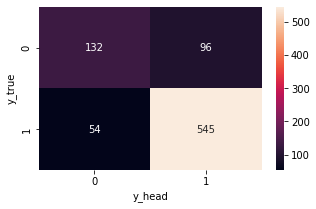

In [33]:
plot_conf_matrix(y_test,predicted)